# Principal component analysis (PCA) / Метод главных компонент (МГК)

---

**Источники:**

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.20.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.4'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [29]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sklearn.__version__

'0.24.2'

In [8]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## Customer Clustering

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [9]:
df = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


### Анализ данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


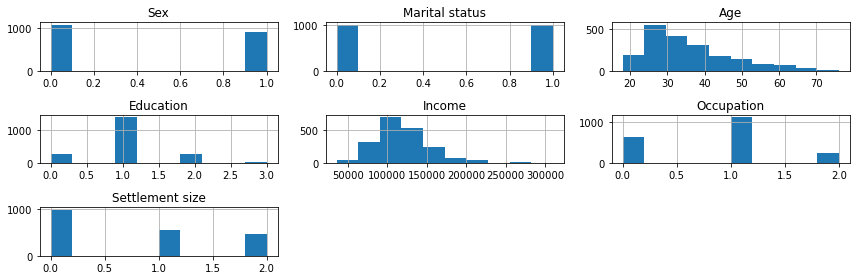

In [11]:
df.hist(figsize=(12, 4))
plt.tight_layout()

### PCA

#### Подготовка

<AxesSubplot:xlabel='ID'>

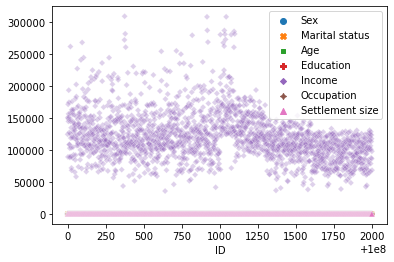

In [12]:
sns.scatterplot(data=df, alpha=0.3)

In [13]:
df_std = StandardScaler().fit_transform(df)
pd.DataFrame(df_std)

,0,1,2,3,4,5,6
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [14]:
def explained_variance_plot(pca):
    features = range(pca.n_components_)
    cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)
    
    plt.bar(features, pca.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')
    
    plt.legend(loc='best')
    plt.tight_layout()

<img src="images/explained_variance_ratio_1.png"/>

<img src="images/explained_variance_ratio_2.png" width=300/>

#### N-D

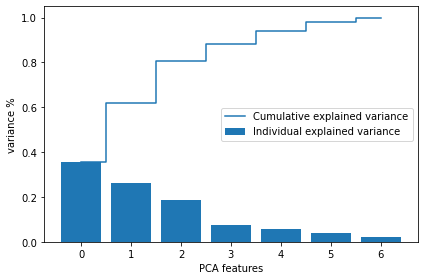

In [15]:
pca = PCA()
pca.fit(df_std)
explained_variance_plot(pca)

#### 2-D

In [16]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_std))
df_pca_2

,0,1
0,2.514746,0.834122
1,0.344935,0.598146
2,-0.651063,-0.680093
3,1.714316,-0.579927
4,1.626745,-0.440496
...,...,...
1995,-0.866034,0.298330
1996,-1.114957,0.794727
1997,-1.452298,-2.235937
1998,-2.241453,0.627108


<AxesSubplot:xlabel='0', ylabel='1'>

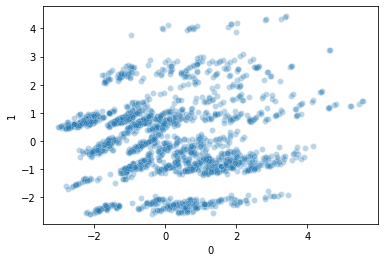

In [17]:
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

#### 3-D

In [18]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_std))
df_pca_3

,0,1,2
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


In [19]:
%matplotlib widget

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(projection='3d')
ax = Axes3D(fig)



# ax.scatter(df_pca_3[0], 
#            df_pca_3[1], 
#            df_pca_3[2], s=30)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
%matplotlib inline

---

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [22]:
df = pd.read_csv("./../../data/CC GENERAL.csv", index_col=0)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


### Анализ данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [27]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [49]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


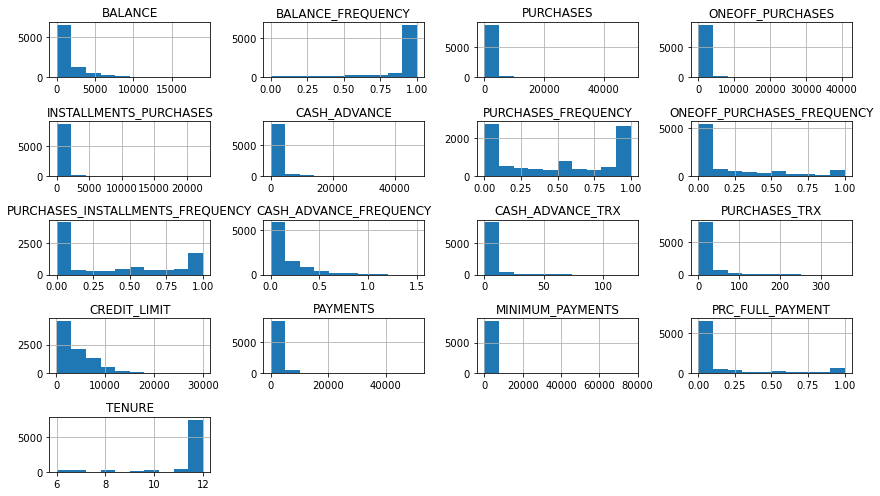

In [24]:
df.hist(figsize=(12, 7))
plt.tight_layout()

### PCA

#### Подготовка

In [47]:
def remove_outliers_iqr(data, col_name):
    print(f"column name: {col_name}")
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    data_new = data[~((data[col_name] < lower_fence) |
                      (data[col_name] > upper_fence))]
    
    diff_len = len(data) - len(data_new)
    print(f"removed: {diff_len}")
    
    _, axs = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(data=data_new[col_name], ax=axs[0])
    sns.histplot(data=data_new[col_name], ax=axs[1])
    
    return data_new.reset_index(drop=True)

len(df_tmp) BEFORE: 8950
column name: BALANCE
removed: 695
------------------------------
column name: BALANCE_FREQUENCY
removed: 1493
------------------------------
column name: PURCHASES
removed: 808
------------------------------
column name: ONEOFF_PURCHASES
removed: 1013
------------------------------
column name: INSTALLMENTS_PURCHASES
removed: 867
------------------------------
column name: CASH_ADVANCE
removed: 1030
------------------------------
column name: PURCHASES_FREQUENCY
removed: 0
------------------------------
column name: ONEOFF_PURCHASES_FREQUENCY
removed: 782
------------------------------
column name: PURCHASES_INSTALLMENTS_FREQUENCY
removed: 0
------------------------------
column name: CASH_ADVANCE_FREQUENCY
removed: 525
------------------------------
column name: CASH_ADVANCE_TRX
removed: 804
------------------------------
column name: PURCHASES_TRX
removed: 766
------------------------------
column name: CREDIT_LIMIT
removed: 248
------------------------------

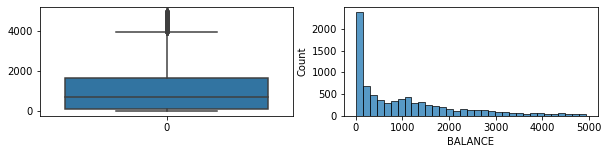

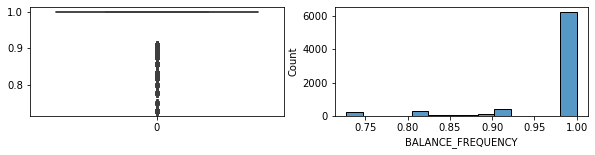

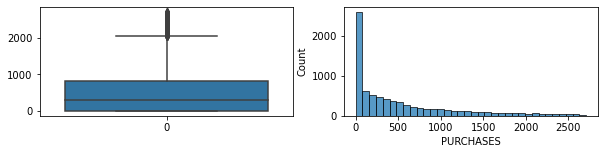

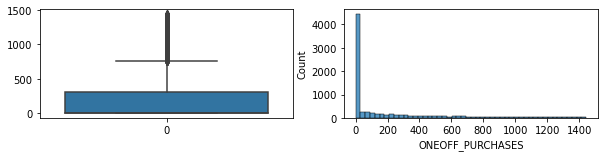

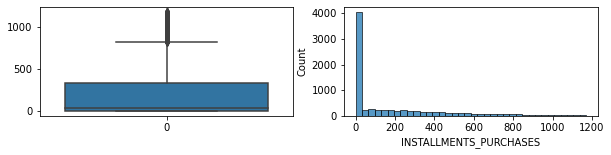

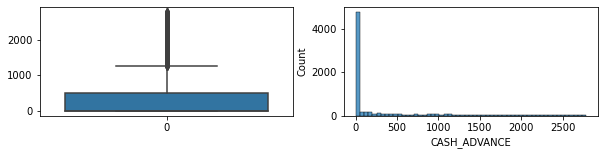

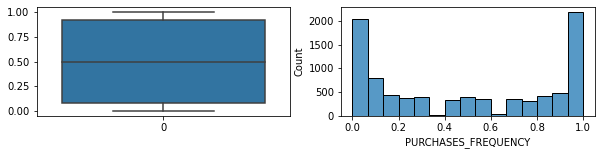

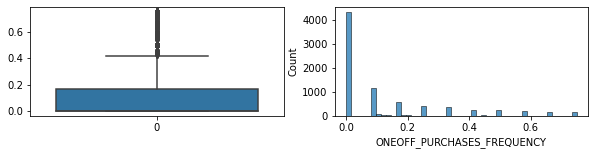

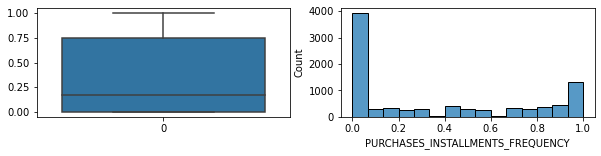

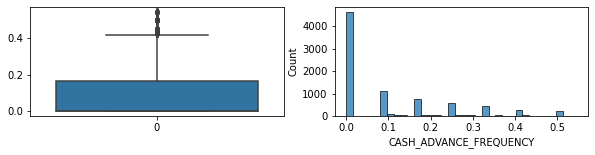

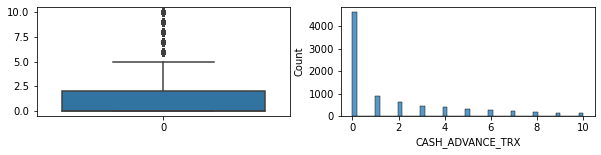

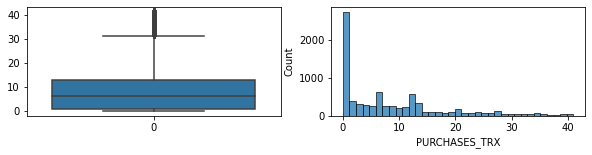

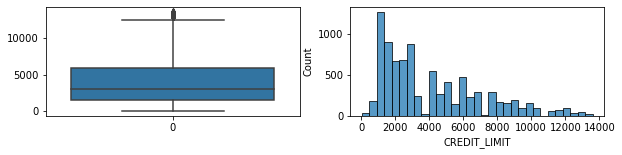

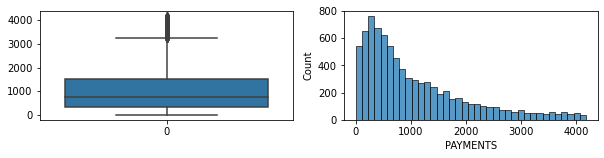

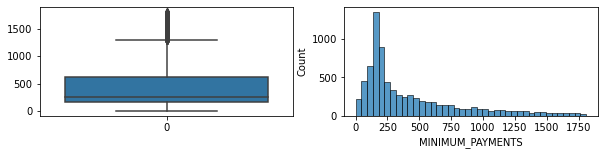

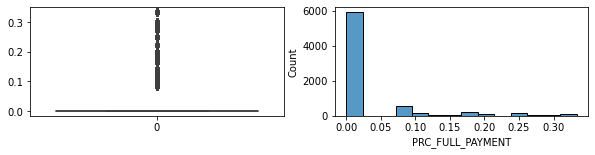

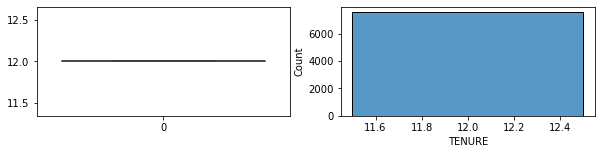

In [48]:
print('len(df_tmp) BEFORE:', len(df))
for col_name in df.select_dtypes(include=np.number):
    df_without_outliers = remove_outliers_iqr(df, col_name)
    print("-"*30)
print('len(df_tmp) AFTER:', len(df_without_outliers))

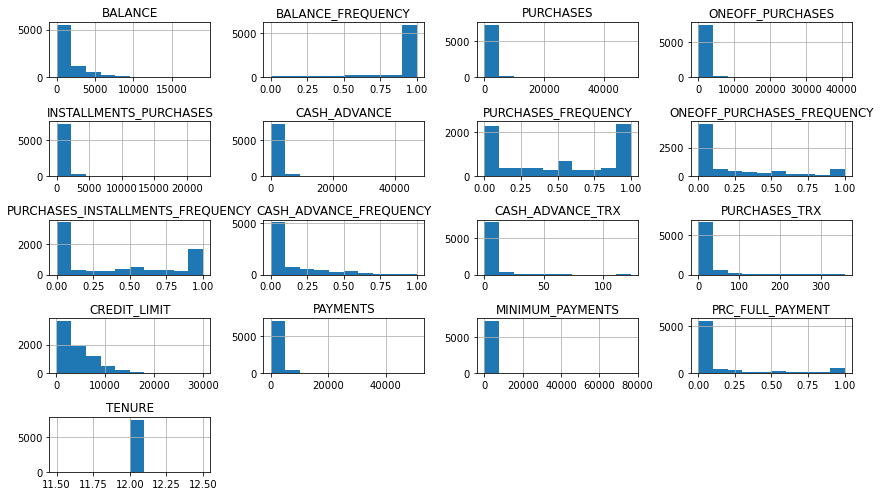

In [50]:
df_without_outliers.hist(figsize=(12, 7))
plt.tight_layout()

In [60]:
df_without_nan = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_without_outliers), columns=df.columns)
df_without_nan.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [61]:
df_std = StandardScaler().fit_transform(df_without_nan)
pd.DataFrame(df_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.738997,-0.303654,-0.439830,-0.363423,-0.369761,-0.442681,-0.845517,-0.695804,-0.739100,-0.654840,-0.469712,-0.537525,-1.005698,-0.547366,-0.307280,-0.527528,0.0
1,0.741362,0.086340,-0.482095,-0.363423,-0.469801,2.696028,-1.260695,-0.695804,-0.945732,0.664933,0.144212,-0.613612,0.628108,0.745403,0.072205,0.236545,0.0
2,0.410170,0.476334,-0.139562,0.075284,-0.469801,-0.442681,1.230367,2.551066,-0.945732,-0.654840,-0.469712,-0.157094,0.764259,-0.408101,-0.108848,-0.527528,0.0
3,0.022247,-1.083643,0.181997,0.487129,-0.469801,-0.342430,-1.053107,-0.425232,-0.945732,-0.214917,-0.316231,-0.575568,0.764259,-0.614238,-0.229839,-0.527528,0.0
4,-0.375265,0.476334,-0.475006,-0.354344,-0.469801,-0.442681,-1.053107,-0.425232,-0.945732,-0.654840,-0.469712,-0.575568,-0.951238,-0.389455,-0.264451,-0.527528,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,-0.544880,0.476334,-0.309449,-0.338059,-0.108021,-0.307787,1.230367,-0.425232,1.327230,-0.214917,0.144212,-0.081007,-1.005698,-0.598135,1.118451,-0.214953,0.0
7580,-0.756726,-3.423612,-0.482095,-0.363423,-0.469801,-0.402944,-1.260695,-0.695804,-0.945732,-0.214917,-0.316231,-0.613612,-1.141849,-0.614238,-0.229839,-0.527528,0.0
7581,-0.737309,0.476334,-0.304106,-0.363423,-0.048500,-0.442681,1.022779,-0.695804,1.327230,-0.654840,-0.469712,-0.157094,-0.869548,-0.517779,-0.296844,1.535473,0.0
7582,-0.726600,0.476334,-0.351403,-0.363423,-0.160453,-0.442681,-0.015164,-0.695804,0.087433,-0.654840,-0.469712,-0.385353,-1.005698,-0.532823,-0.296046,0.503972,0.0


#### N-D

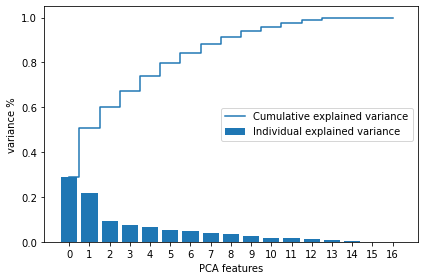

In [62]:
pca = PCA()
pca.fit(df_std)
explained_variance_plot(pca)

#### 2-D

In [63]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_std))
df_pca_2

,0,1
0,-1.815618,-1.050257
1,-1.231365,2.555026
2,0.788881,-0.440616
3,-1.040684,-0.011094
4,-1.737396,-0.671501
...,...,...
7579,-0.003064,-0.948266
7580,-2.524450,-1.117973
7581,0.081067,-2.004969
7582,-0.917068,-1.429406


<AxesSubplot:xlabel='0', ylabel='1'>

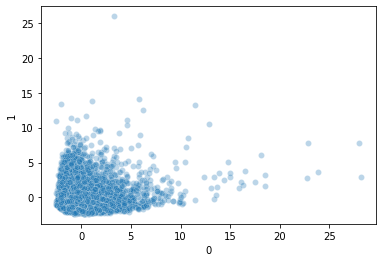

In [64]:
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

#### 3-D

In [65]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_std))
df_pca_3

,0,1,2
0,-1.815618,-1.050257,0.521157
1,-1.231363,2.555015,0.742385
2,0.788880,-0.440611,0.068899
3,-1.040683,-0.011099,1.501888
4,-1.737397,-0.671498,0.393232
...,...,...,...
7579,-0.003064,-0.948268,-1.988659
7580,-2.524450,-1.117972,1.958844
7581,0.081067,-2.004968,-1.161256
7582,-0.917068,-1.429405,-0.353242


In [66]:
%matplotlib widget

In [67]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(projection='3d')
ax = Axes3D(fig)



# ax.scatter(df_pca_3[0], 
#            df_pca_3[1], 
#            df_pca_3[2], s=30)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [68]:
%matplotlib inline